EDA

In [91]:
import pandas as pd
waiting_times = pd.read_csv('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/waiting_times.csv')
weather = pd.read_csv('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/weather_data.csv')
entity = pd.read_csv('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/entity_schedule.csv')
attendance = pd.read_csv('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/attendance.csv')
link_attraction_park = pd.read_csv('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/link_attraction_park.csv', delimiter= ';')
parade_night_show = pd.read_excel('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/parade_night_show.xlsx')



In [146]:
attendance

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365
...,...,...,...
2362,2022-07-24,Tivoli Gardens,26798
2363,2022-07-25,PortAventura World,53764
2364,2022-07-25,Tivoli Gardens,27061
2365,2022-07-26,PortAventura World,26391


In [140]:
waiting_times[waiting_times['DEB_TIME'].str.contains('2020-01-29')]


,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
1569415,2020-01-29,2020-01-29 13:45:00.000,13,2020-01-29 14:00:00.000,Merry Go Round,15,129.0000,260.0000,484.000,480.25,15,15,0,130.0
1569416,2020-01-29,2020-01-29 16:30:00.000,16,2020-01-29 16:45:00.000,Roller Coaster,20,2.0000,33.0000,75.000,75.00,15,15,0,2.0
1569417,2020-01-29,2020-01-29 12:30:00.000,12,2020-01-29 12:45:00.000,Crazy Dance,5,1.0000,134.0000,250.001,250.00,15,15,0,1.0
1569418,2020-01-29,2020-01-29 11:30:00.000,11,2020-01-29 11:45:00.000,Inverted Coaster,0,0.0000,0.0000,0.000,0.00,0,0,0,2.0
1569419,2020-01-29,2020-01-29 10:00:00.000,10,2020-01-29 10:15:00.000,Bungee Jump,5,4.0000,121.0000,306.750,245.25,15,15,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571482,2020-01-29,2020-01-29 16:45:00.000,16,2020-01-29 17:00:00.000,Monorail,40,10.8667,155.0000,223.751,221.05,15,15,0,11.0
1571483,2020-01-29,2020-01-29 21:45:00.000,21,2020-01-29 22:00:00.000,Haunted House,0,9.0000,0.0000,0.000,0.00,0,0,0,9.0
1571484,2020-01-29,2020-01-29 11:30:00.000,11,2020-01-29 11:45:00.000,Zipline,15,11.0000,59.9999,101.250,92.75,15,15,0,12.0
1571485,2020-01-29,2020-01-29 22:45:00.000,22,2020-01-29 23:00:00.000,Haunted House,0,9.0000,0.0000,0.000,0.00,0,0,0,9.0


In [145]:
attr = entity[entity['ENTITY_TYPE'] == 'ATTR']
attr_closed = attr[attr['REF_CLOSING_DESCRIPTION'].notnull()]
attr_closed[attr_closed['DEB_TIME'].str.contains('2020-01-29')]


,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
8440,Fermeture Réhab,Gondola,ATTR,2020-01-29 23:59:00.000,2020-01-29 23:59:00.000,2020-01-30 08:07:07.000,2020-01-29
10445,Fermeture Réhab,Top Spin,ATTR,2020-01-29 23:59:00.000,2020-01-29 23:59:00.000,2020-01-30 08:07:07.000,2020-01-29
32331,Fermeture Réhab,Inverted Coaster,ATTR,2020-01-29 23:59:00.000,2020-01-29 23:59:00.000,2020-01-30 08:07:02.000,2020-01-29
36067,Fermeture Réhab,Superman Ride,ATTR,2020-01-29 23:59:00.000,2020-01-29 23:59:00.000,2020-01-30 08:07:02.000,2020-01-29
36340,Fermeture Réhab,Log Flume,ATTR,2020-01-29 23:59:00.000,2020-01-29 23:59:00.000,2020-01-30 08:06:57.000,2020-01-29


In [120]:
parade_night_show

,Unnamed: 0,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,0,2018-10-01,20:00:00,17:30:00,12:10:00
1,1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2,2018-10-03,20:00:00,17:30:00,12:10:00
3,3,2018-10-04,20:00:00,17:30:00,12:10:00
4,4,2018-10-05,20:00:00,17:30:00,12:10:00
...,...,...,...,...,...
666,666,2022-08-14,23:00:00,17:30:00,NaN
667,667,2022-08-15,23:00:00,17:30:00,NaN
668,668,2022-08-16,23:00:00,17:30:00,NaN
669,669,2022-08-17,23:00:00,17:30:00,NaN


In [112]:
parade_night_show['PARADE_1'].value_counts()

17:30:00    406
17:00:00    193
16:30:00     60
16:00:00      5
18:30:00      4
12:00:00      1
15:15:00      1
17:15:00      1
Name: PARADE_1, dtype: int64

In [119]:
parade_night_show['PARADE_2'].unique()

array([datetime.time(12, 10), datetime.time(12, 25), nan,
       datetime.time(11, 50), datetime.time(16, 30),
       datetime.time(10, 50), datetime.time(11, 15),
       datetime.time(12, 30), datetime.time(12, 15), datetime.time(12, 0),
       datetime.time(11, 0), datetime.time(12, 55), datetime.time(11, 30)],
      dtype=object)

In [114]:
parade_night_show['NIGHT_SHOW'].value_counts()

23:00:00    245
22:00:00    111
19:00:00     94
20:00:00     83
21:00:00     40
18:30:00     30
19:30:00     25
18:00:00     15
22:30:00     13
20:30:00      8
18:40:00      2
18:10:00      2
20:20:00      1
21:30:00      1
19:10:00      1
Name: NIGHT_SHOW, dtype: int64

In [107]:
waiting_times

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00.000,18,2022-08-18 19:00:00.000,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509320,2022-08-18,2022-08-18 10:15:00.000,10,2022-08-18 10:30:00.000,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509321,2022-08-18,2022-08-18 09:15:00.000,9,2022-08-18 09:30:00.000,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509322,2022-08-18,2022-08-18 20:30:00.000,20,2022-08-18 20:45:00.000,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0


In [110]:
attendance[attendance['USAGE_DATE'].str.contains('2018-08-30')]

,USAGE_DATE,FACILITY_NAME,attendance
180,2018-08-30,PortAventura World,61159
181,2018-08-30,Tivoli Gardens,30287


In [105]:
link_attraction_park

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens
5,Crazy Dance,PortAventura World
6,Dizzy Dropper,PortAventura World
7,Drop Tower,PortAventura World
8,Flying Coaster,PortAventura World
9,Free Fall,PortAventura World


In [103]:
weather_3600[weather_3600['dt_iso'].str.contains('2018-01-01')]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
166560,1514764800,2018-01-01 00:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.94,NaN,4.56,5.21,...,NaN,NaN,NaN,NaN,NaN,23,801,Clouds,few clouds,02n
166561,1514768400,2018-01-01 01:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.07,NaN,3.72,4.09,...,NaN,NaN,NaN,NaN,NaN,4,800,Clear,sky is clear,01n
166562,1514772000,2018-01-01 02:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.76,NaN,3.42,3.81,...,NaN,NaN,NaN,NaN,NaN,27,802,Clouds,scattered clouds,03n
166563,1514775600,2018-01-01 03:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.57,NaN,3.43,3.63,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
166564,1514779200,2018-01-01 04:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.86,NaN,3.30,2.88,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n
166565,1514782800,2018-01-01 05:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.85,NaN,3.29,2.95,...,NaN,NaN,NaN,NaN,NaN,36,802,Clouds,scattered clouds,03n
166566,1514786400,2018-01-01 06:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.48,NaN,3.11,2.40,...,NaN,NaN,NaN,NaN,NaN,49,802,Clouds,scattered clouds,03n
166567,1514790000,2018-01-01 07:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.72,NaN,3.69,2.80,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
166568,1514793600,2018-01-01 08:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.67,NaN,3.82,2.69,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
166569,1514797200,2018-01-01 09:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.76,NaN,4.08,2.62,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_72049/601105374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendance_filtered['USAGE_DATE'] = pd.to_datetime(attendance_filtered['USAGE_DATE'])
/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_72049/601105374.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_attendance_filtered = attendance_filtered.resample('M').sum()


Text(0, 0.5, 'Total attendance_filtered')

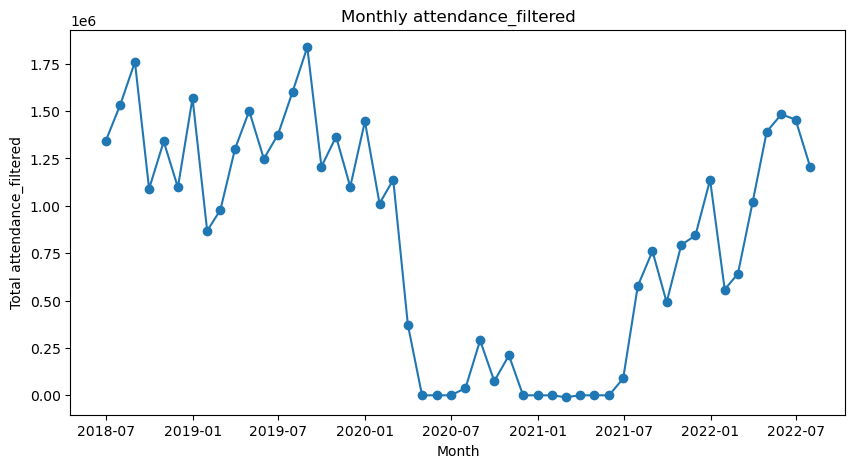

In [80]:
import matplotlib.pyplot as plt 
attendance_filtered['USAGE_DATE'] = pd.to_datetime(attendance_filtered['USAGE_DATE'])

attendance_filtered.set_index('USAGE_DATE', inplace=True)

monthly_attendance_filtered = attendance_filtered.resample('M').sum()

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_attendance_filtered.index, monthly_attendance_filtered['attendance'], marker='o')

plt.title('Monthly attendance_filtered')
plt.xlabel('Month')
plt.ylabel('Total attendance_filtered')

In [9]:
parade_night_show

,Unnamed: 0,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,0,2018-10-01,20:00:00,17:30:00,12:10:00
1,1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2,2018-10-03,20:00:00,17:30:00,12:10:00
3,3,2018-10-04,20:00:00,17:30:00,12:10:00
4,4,2018-10-05,20:00:00,17:30:00,12:10:00
...,...,...,...,...,...
666,666,2022-08-14,23:00:00,17:30:00,NaN
667,667,2022-08-15,23:00:00,17:30:00,NaN
668,668,2022-08-16,23:00:00,17:30:00,NaN
669,669,2022-08-17,23:00:00,17:30:00,NaN


,ATTRACTION;PARK
0,Aeroplane Ride;Tivoli Gardens
1,Bumper Cars;PortAventura World
2,Bungee Jump;PortAventura World
3,Circus Train;PortAventura World
4,Crazy Bus;Tivoli Gardens
5,Crazy Dance;PortAventura World
6,Dizzy Dropper;PortAventura World
7,Drop Tower;PortAventura World
8,Flying Coaster;PortAventura World
9,Free Fall;PortAventura World
